In [1]:
%pylab inline
from scipy.optimize import curve_fit
from scipy.constants import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
frek = array([4.074, 5.1105, 5.552, 7.213])
freker = 0.03
B1 = array([27.5, 36, 38, 50])
B2 = array([29, 36, 38, 50])
B3 = array([28, 36, 39, 50])

In [3]:
B = array(zeros(4))
for i in range(len(B1)):
    B[i] = (B1[i] + B2[i] + B3[i])/3 * 3.35 * 1e-3
    
omega = 2 * pi * frek * 1e6
omegaer = 2 * pi *freker * 1e6

In [10]:
print(omega)
print(B)
print(omegaer)

[25597696.94144963 32110218.51234128 34884244.82546106 45320615.62068635]
[0.09435833 0.1206     0.12841667 0.1675    ]
188495.55921538756


In [5]:
def lin(x, a):
    return a*x

def illeszt(f, x, y):
    popt,pcov=curve_fit(f, x, y) # az illesztés elvégzése
    perr = sqrt(diag(pcov))      # az illesztési paraméterek hibáinak meghatározása
    print(popt, '+-', perr)
    return popt, perr

In [6]:
gamma, dgamma = illeszt(lin, B, omega)

[2.70001981e+08] +- [1156255.15413136]


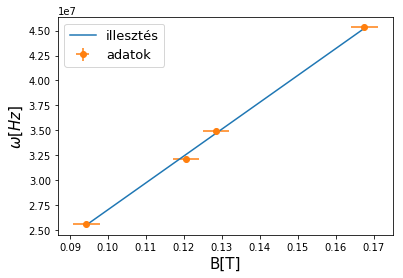

In [24]:
x = linspace(25, 52, 1000)

xlabel('B[T]', fontsize = 15)
ylabel(r'$\omega[Hz]$', fontsize = 15)

plot(B, lin(B, gamma[0]), label='illesztés')
errorbar(B, omega, yerr = 3e3*2*pi, xerr = 0.0035, linestyle='', marker='o', label='adatok')

legend(fontsize = 13)
savefig('gamma.png')

In [8]:
G = 2*m_p/elementary_charge * gamma[0]
G

5.6374711721385

In [27]:
deltaG = 2*m_p/elementary_charge * dgamma[0]
deltaG

0.02414187880871462

In [10]:
z = array([1, 2, 3, 4, 5, 6, 7, 8, 11])
deltaB = array([0.1851, 0.5559, 0.4632, 0.1851, 0.0926, -0.0926, 0, 0, -0.0926])

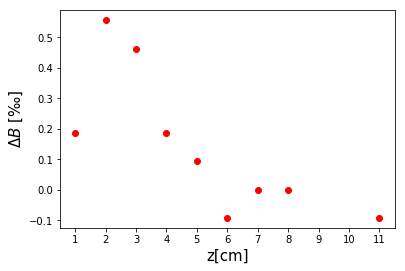

In [17]:
xlabel('z[cm]', fontsize = 15)
ylabel(u'$\Delta B$ [\u2030]', fontsize = 15)
xticks([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])
plot(z, deltaB, 'ro')
savefig('inhom.png')